In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
df = pd.read_csv('../../../data/dark_patterns.csv', delimiter=";")
df_ranks = pd.read_csv('../../../data/eshop_list.csv',
                       delimiter=",",
                       header=None,
                       names=['Name', 'HeurekaURL', 'URL', 'Domain']
                      )
df_ranks['rank'] = df_ranks.index+1
df['Domain'] = df['Domain'].str.replace('www.','')
df_ranks['Domain'] = df_ranks['Domain'].str.replace('www.','')

In [3]:
df = pd.merge(df,df_ranks,on='Domain',how='left')

In [4]:
df[df['rank'].isnull()]

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website,Deceptive,Website Page,Domain,Name,HeurekaURL,URL,rank


## How many Dark Patterns were found

In [5]:
df.shape

(1430, 12)

## Eshops with the most occurences of Dark Patterns 

In [6]:
df.groupby('Domain')['Domain'].count().nlargest(20)

Domain
muziker.cz              9
coolboty.cz             8
jumboshop.cz            8
rescue-store.cz         8
cool-ceny.cz            7
ergobaby-eshop.cz       7
lopra.cz                7
buddytoys-eshop.cz      6
buxton-eshop.cz         6
pepovasleva.cz          6
ahifi.cz                5
eroticke-pomucky.com    5
eshop.alfafit.cz        5
fitanu.com              5
hospodynkam.cz          5
martinus.cz             5
memoa.cz                5
postovnezdarma.cz       5
probazen.com            5
skladovky.cz            5
Name: Domain, dtype: int64

In [7]:
#df[df['Domain']=="muziker.cz"]

## Sum of used dark pattern by category

In [8]:
df[['Pattern Category', 'Domain']].groupby('Pattern Category').agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                  count nunique
Pattern Category               
Forced Action        75      62
Misdirection       1020     874
Obstruction           6       6
Scarcity             45      41
Sneaking              2       2
Social Proof        242     207
Urgency              40      37

## Sum of used dark pattern by type

In [9]:
df[['Pattern Type', 'Domain']].groupby('Pattern Type').agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                  count nunique
Pattern Type                                   
Activity Message                    223     193
Countdown Timer                      23      20
Forced Enrollment                    75      62
Hard to Cancel                        6       6
High-demand Message                   7       7
Limited-time Message                 17      17
Low-stock Message                    38      36
Pressured Selling                   924     843
Sneak into Basket                     2       2
Testimonials of Uncertain Origin     19      16
Trick Questions                      68      63
Visual Interference                  28      20

In [10]:
df[['Pattern Category','Pattern Type', 'Domain']].groupby(['Pattern Category','Pattern Type']).agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                                   count nunique
Pattern Category Pattern Type                                   
Forced Action    Forced Enrollment                    75      62
Misdirection     Pressured Selling                   924     843
                 Trick Questions                      68      63
                 Visual Interference                  28      20
Obstruction      Hard to Cancel                        6       6
Scarcity         High-demand Message                   7       7
                 Low-stock Message                    38      36
Sneaking         Sneak into Basket                     2       2
Social Proof     Activity Message                    223     193
                 Testimonials of Uncertain Origin     19      16
Urgency          Countdown Timer                      23      20
                 Limited-time Message                 17      17

## How many eshops contain dark pattern

In [11]:
df['Domain'].unique().shape

(1081,)

In [12]:
1081/10000

0.1081

## Plot prevelance of dark patterns on 10K eshops

In [13]:
# To print whole tables
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [14]:
dataset_length = 10000
bin_size = 200;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)
df['binned_rank'] = pd.cut(df['rank'], bins)

In [15]:
df_unique = df.drop_duplicates(subset="Domain")
#df_unique = df_unique[df_unique['Pattern Type'] != 'Pressured Selling']
#data = df_unique[['binned_rank', 'rank']].groupby('binned_rank').apply(lambda x: x['rank'].count()*100/bin_size)
data = df_unique[['binned_rank', 'rank']].groupby('binned_rank').agg(dp_eshop_percent=('binned_rank','count'))*100/bin_size

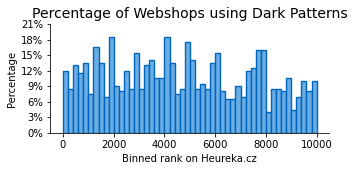

In [16]:
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.bar(range(0,bins_count), data['dp_eshop_percent'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
    plt.xlabel('Binned rank on Heureka.cz') 
    plt.ylabel('Percentage') 
    plt.title('Percentage of Webshops using Dark Patterns', fontsize=14) 
    plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
    plt.yticks(range(0,24,3))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(100, decimals=0))
    plt.gcf().set_size_inches(5,2)
    plt.savefig('../../../thesis/media/graphs/freq-histogram-dp.pgf')

<ipython-input-17-522e19558b7d>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


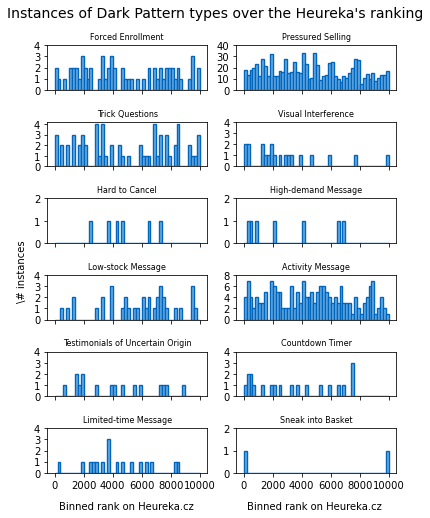

In [17]:
dp_types = ['Forced Enrollment', 'Pressured Selling',
            'Trick Questions', 'Visual Interference',
            'Hard to Cancel', 'High-demand Message',
            'Low-stock Message', 'Activity Message',
            'Testimonials of Uncertain Origin',
            'Countdown Timer', 'Limited-time Message',
            'Sneak into Basket']

fig, axs = plt.subplots(6,2,sharex=True)
fig.text(0.5, 0.97, 'Instances of Dark Pattern types over the Heureka\'s ranking', fontsize=14, ha='center') 

datas = []
ymajorticks = [(5, 1), (50, 10), (5, 1), (5, 1), (3, 1), (3, 1), (5, 1), (10,2), (5,1), (5,1), (5,1), (3,1)]
i=0
plt.tight_layout(rect=[0.02, 0.03, 1, 0.97],h_pad=0.7) 
for dp_type in dp_types:
    df_by_type = df[df['Pattern Type'] == dp_types[i]].drop_duplicates(subset='Domain')
    datas.append(df_by_type[['binned_rank', 'rank']].groupby('binned_rank').agg(dp_count=('binned_rank','count')))
    i+=1
    
i=0
for row in axs:
    for ax in row:
        with plt.rc_context({
            "axes.spines.right": False,
            "axes.spines.top": False,
        }): 
    #         fig.subxlabel('Binned rank on Heureka.cz') 
    #         fig.subylabel('Percentage') 
            ax.bar(range(0,bins_count), datas[i]['dp_count'], width=1, edgecolor="#0065BD", align='edge', linewidth=1.4, color="#6AADE4")
            plt.sca(ax)
            plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
            plt.yticks(range(0,ymajorticks[i][0],ymajorticks[i][1]))
            plt.title(dp_types[i], fontsize=8)
            plt.gcf().set_size_inches(12,6)
            i+=1
                    
plt.gcf().set_size_inches(5.5,7.5)
fig.text(0.275, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0.75, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0, 0.50, '\# instances', va='center', rotation='vertical')
fig.show()
plt.savefig('../../../thesis/media/graphs/dp-by-type.pgf')


In [18]:
temp = data['dp_eshop_percent'].to_frame().reset_index()
temp['index'] = range(0,50,1)

In [19]:
from scipy import stats
tau, p_value = stats.spearmanr(temp['index'], temp['dp_eshop_percent'])
print(tau, p_value)

-0.29129572075632404 0.040128974805467565


# E-commerce solutions used by webshops

In [38]:
df_ecommerce = pd.read_csv('../../../data/e-commerce-solutions.csv', delimiter=";")
df_ecommerce['Domain'] = df_ecommerce['domain'].str.replace('www.', '')
del df_ecommerce['domain']

In [39]:
pages = [
    'obchod.pohledysdarkem.cz',
    'shop.forstcz.cz',
    'shop.bontcycling.cz'
]
df_ecommerce['Domain'] = df_ecommerce['Domain'].apply(lambda x: x.replace('shop.', '').replace('obchod.', '') if x in pages else x)

In [40]:
df_ecommerce = pd.merge(df_ecommerce,df_ranks,on='Domain',how='left')

In [41]:
df_ecommerce[df_ecommerce['rank'].isnull()]

,inner_text,site_url,e-shop,Domain,Name,HeurekaURL,URL,rank


In [42]:
dataset_length = 10000
bin_size = 200;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)

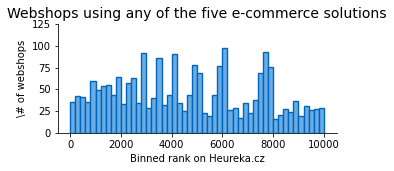

In [43]:
df_ecommerce['binned_rank'] = pd.cut(df_ecommerce['rank'], bins)
# sum of all
data = df_ecommerce[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count'))

with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.bar(range(0,bins_count), data['count'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
    plt.xlabel('Binned rank on Heureka.cz') 
    plt.ylabel('\# of webshops') 
    plt.title('Webshops using any of the five e-commerce solutions', fontsize=14) 
    plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
    plt.yticks(range(0,150,25))
    plt.gcf().set_size_inches(5,2)
    plt.savefig('../../../thesis/media/graphs/e-commercesolution-histogram.pgf')

<ipython-input-44-8a44d92bd951>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


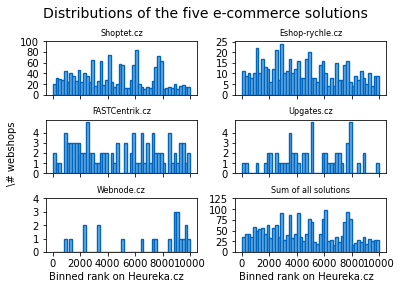

In [44]:
solutions = ['shoptet', 'eshop-rychle', 'fastcentrik', 'upgates', 'webnode']
names = ['Shoptet.cz', 'Eshop-rychle.cz', 'FASTCentrik.cz', 'Upgates.cz', 'Webnode.cz', 'Sum of all solutions']

fig, axs = plt.subplots(3,2,sharex=True)
fig.text(0.5, 0.97, 'Distributions of the five e-commerce solutions', fontsize=14, ha='center') 

datas = []
ymajorticks = [(120, 20), (30, 5), (5, 1), (5, 1), (5, 1), (150, 25)]
i=0
plt.tight_layout(rect=[0.02, 0.06, 1, 0.94],h_pad=1.5) 
for solution in solutions:
    df_by_solution = df_ecommerce[df_ecommerce['e-shop'] == solution]
    datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))
    i+=1
    
i=0
for row in axs:
    for ax in row:
        with plt.rc_context({
            "axes.spines.right": False,
            "axes.spines.top": False,
        }):  
            if i == 5:
                ax.bar(range(0,bins_count), data['count'], width=1, align='edge', edgecolor='#0065BD', linewidth=1.4, color="#6AADE4")
            else:
                ax.bar(range(0,bins_count), datas[i]['count'], width=1, edgecolor="#0065BD", align='edge', linewidth=1.4, color="#6AADE4")
            plt.sca(ax)
            plt.xticks(range(0,bins_count+4,10),[0,2000,4000,6000,8000,10000])
            plt.yticks(range(0,ymajorticks[i][0],ymajorticks[i][1]))
            plt.title(names[i], fontsize=8)
            plt.gcf().set_size_inches(12,6)
            i+=1
                    
plt.gcf().set_size_inches(5.5,4)
fig.text(0.275, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0.755, 0.06, 'Binned rank on Heureka.cz', ha='center')
fig.text(0, 0.50, '\# webshops', va='center', rotation='vertical')
fig.show()
plt.savefig('../../../thesis/media/graphs/ecommerce-solutions-histograms.pgf')
datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))

In [45]:
dataset_length = 10000
bin_size = 200;
bins_count = int(dataset_length/bin_size)
bins = np.linspace(0,dataset_length,bins_count+1)

df_ecommerce['binned_rank'] = pd.cut(df_ecommerce['rank'], bins)

data = df_ecommerce[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count'))

datas = []
i=0
for solution in solutions:
    df_by_solution = df_ecommerce[df_ecommerce['e-shop'] == solution]
    datas.append(df_by_solution[['binned_rank', 'rank']].groupby('binned_rank').agg(count=('binned_rank','count')))
    i+=1

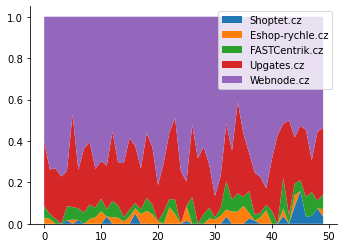

In [46]:
with plt.rc_context({
    "axes.spines.right": False,
    "axes.spines.top": False,
}): 
    plt.tight_layout()
    plt.stackplot(range(0,bins_count),
                  (datas[4]/data)['count'],
                  (datas[3]/data)['count'],
                  (datas[2]/data)['count'],
                  (datas[1]/data)['count'],
                  (datas[0]/data)['count'],
                  labels=['Shoptet.cz', 'Eshop-rychle.cz', 'FASTCentrik.cz', 'Upgates.cz', 'Webnode.cz'])
    plt.gcf().set_size_inches(5.5,4)
    plt.legend()
    plt.show()

## Which dark patterns are used by different e-commerce solutions.

Firstly, generate a file of used e-commerce solutions for websites via Jupyter notebook in e-commerce-solutions folder.

In [47]:
df_ecommerce = pd.read_csv('../../../data/e-commerce-solutions.csv', delimiter=";")
df_ecommerce['Domain'] = df_ecommerce['domain'].str.replace('www.', '')
del df_ecommerce['domain']

In [48]:
df_ecommerce = pd.merge(df_ecommerce,df,on='Domain',how='inner')
df_ecommerce.shape

(675, 16)

In [49]:
df_ecommerce['pattern_string_lower_case'] = df_ecommerce['Pattern String'].apply(lambda x: str(x).lower())
df_ecommerce['pattern_string_lower_case'] = df_ecommerce['pattern_string_lower_case'].replace("([0-9]+[ ,.-/:]*)+","NUMBER", regex=True)
df_ecommerce = df_ecommerce.sort_values(['e-shop','pattern_string_lower_case'], ascending=(True,True))

df_ecommerce_unique = df_ecommerce.drop_duplicates(
    subset=['pattern_string_lower_case',
            'e-shop',
            'Pattern Category',
            'Pattern Type',
            'Where in website'],
    keep='last')

df_ecommerce_unique[['Domain','e-shop', 'Pattern Type']].groupby(['Pattern Type','e-shop']).agg({'Domain': ['count', pd.Series.nunique]})

Domain        
                                   count nunique
Pattern Type         e-shop                     
Activity Message     eshop-rychle      5       5
                     fastcentrik       5       3
                     shoptet          24      20
                     upgates           2       2
Countdown Timer      shoptet           2       2
Forced Enrollment    eshop-rychle      7       4
                     fastcentrik       1       1
                     shoptet           1       1
                     upgates           1       1
Hard to Cancel       eshop-rychle      1       1
High-demand Message  shoptet           1       1
Limited-time Message shoptet           2       2
Low-stock Message    shoptet           1       1
Pressured Selling    eshop-rychle      3       3
                     fastcentrik      11       9
                     shoptet          13      11
                     upgates           1       1
Trick Questions      fastcentrik       1       1
                     shoptet           2       2
                     upgates           1       1
Visual Interference  eshop-rychle      2       1
                     upgates           1       1

In [ ]:
df['']